In [1]:
# this is for SWE402 data mining group project 1 of XYH&YKX
#import the library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
#readf the csv file
Calendar = pd.read_csv("D:/project/Github/DM-Project/calendar.csv")
Calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [2]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [3]:
#describe the count of the data 
Calendar.describe(include='object')

,date,available,price
count,1308890,1308890,643037
unique,365,2,1246
top,2017-09-05,f,$150.00
freq,3586,665853,20752


In [4]:
#Drop the duplicate values
Calendar.drop_duplicates()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


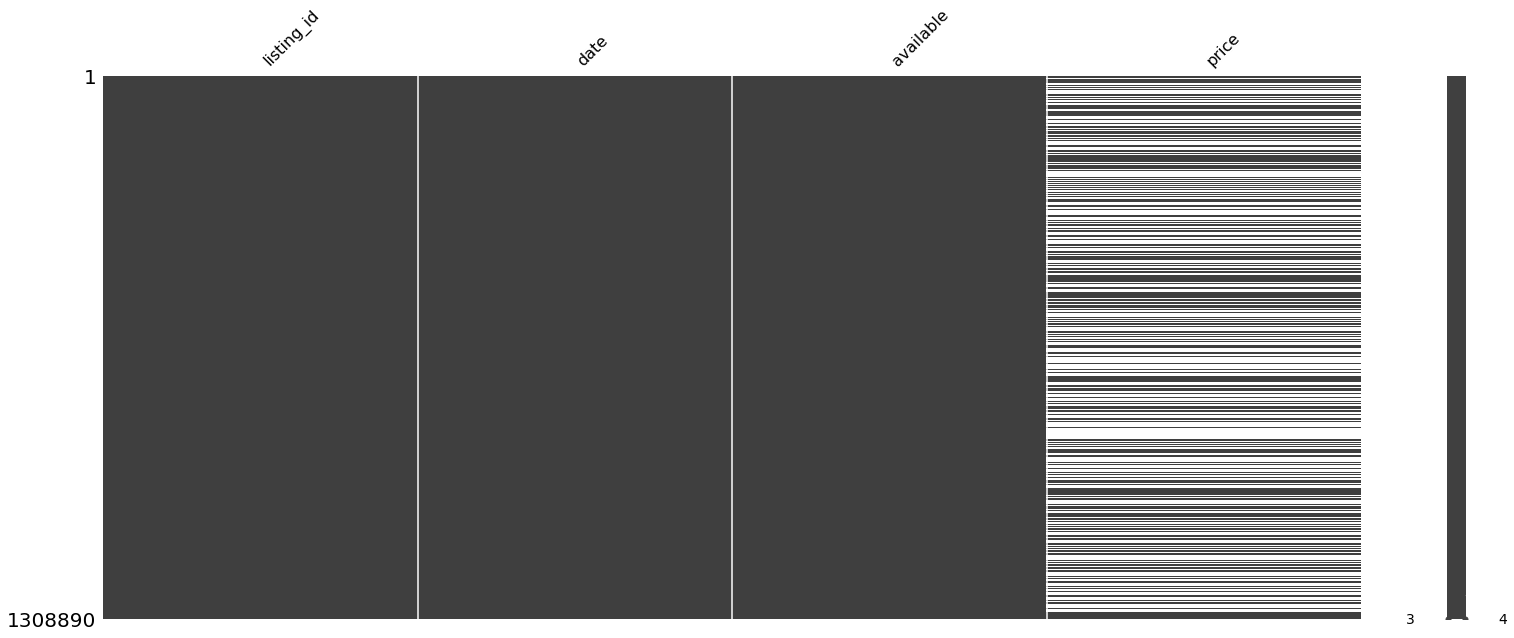

In [5]:
#Visualization of the null value in calendar.csv
import missingno as msno

msno.matrix(Calendar);

In [6]:
#Drop the null value rows
Calendar.dropna(subset=['price'], inplace=True)

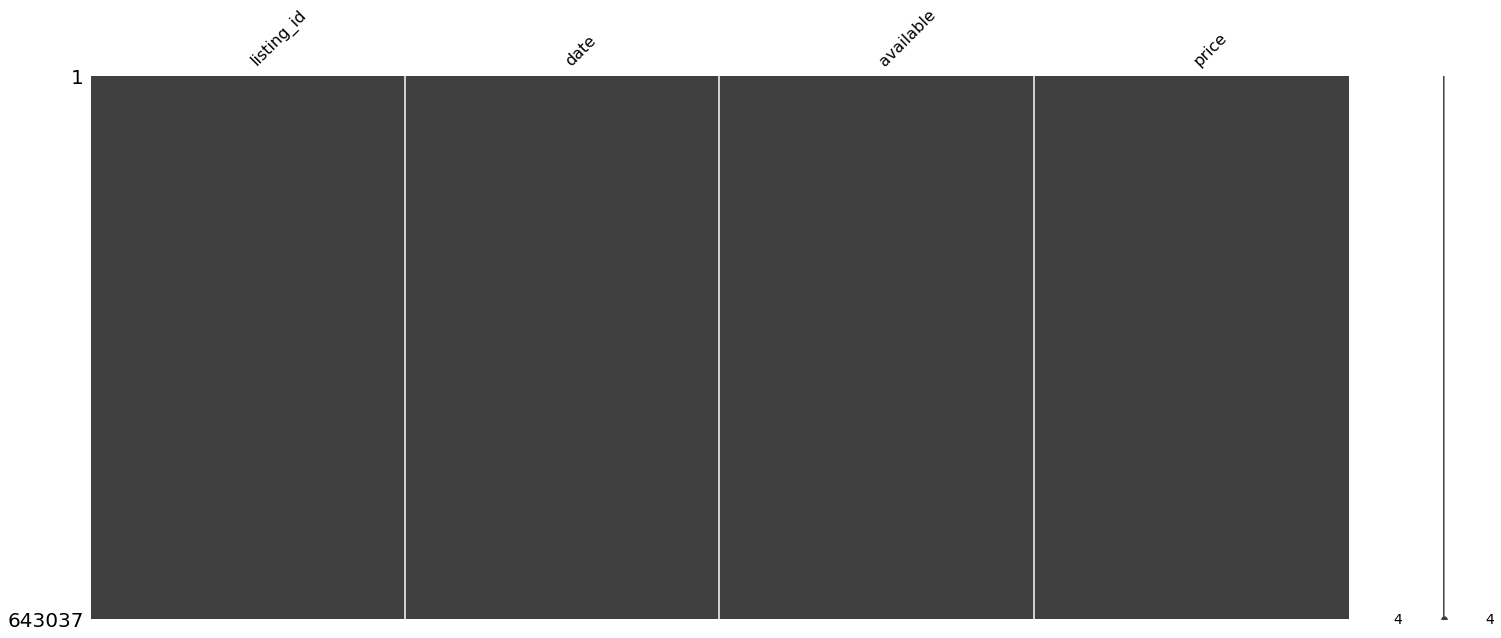

In [7]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

In [8]:
# convert string type into number type for price and remove $ sign
import re
Calendar.price = Calendar.price.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [9]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   listing_id  643037 non-null  int64  
 1   date        643037 non-null  object 
 2   available   643037 non-null  object 
 3   price       643037 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.5+ MB


In [10]:
# Extract month and year from date string and rewrite values

Calendar['date'] = pd.to_datetime(Calendar.date)
    
month = Calendar['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})
 
year =Calendar['date'].dt.year
    
Calendar['Month'] = month
Calendar['Year'] = year

In [11]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
867789,8460627,2016-12-16,t,100.0,December,2016
924406,8515356,2016-10-28,t,99.0,October,2016
243622,766700,2017-02-21,t,125.0,February,2017
1104352,3294152,2016-11-30,t,110.0,November,2016
654428,8814039,2017-06-01,t,640.0,June,2017
937498,8461819,2017-02-22,t,70.0,February,2017
501507,1776190,2016-09-08,t,289.0,Septempber,2016
336706,27141,2016-12-05,t,255.0,December,2016
950136,7476671,2017-05-12,t,65.0,May,2017
770132,10117803,2016-09-23,t,537.0,Septempber,2016


In [12]:
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['available']
for column in boolean_columns:
    Calendar[column] =  Calendar[column].apply(lambda val: True if val=='t' else False)

In [13]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
427207,8211468,2016-11-22,True,139.0,November,2016
716019,10164810,2017-07-18,True,179.0,July,2017
737740,508017,2017-06-18,True,199.0,June,2017
1222519,4340110,2017-04-21,True,90.0,April,2017
455072,3182473,2017-07-11,True,259.0,July,2017
435686,7342489,2017-07-27,True,225.0,July,2017
622945,45987,2017-06-02,True,150.0,June,2017
139307,2798787,2017-07-03,True,75.0,July,2017
1109191,10053549,2016-10-19,True,571.0,October,2016
840435,8165898,2017-01-22,True,331.0,January,2017


In [14]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   available   643037 non-null  bool          
 3   price       643037 non-null  float64       
 4   Month       643037 non-null  object        
 5   Year        643037 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 30.0+ MB
